In [1]:
# import those require libraries (packages)
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# initialize those required datasets' url
raw_bechdel_url = (r"https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-03-09/raw_bechdel.csv")
movies_url = (r"https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-03-09/movies.csv")
age_url = (r'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-02-14/age_gaps.csv')

# read those datasets into csv format
raw_bechdel_csv = pd.read_csv(raw_bechdel_url)
movies_csv = pd.read_csv(movies_url)
age_csv = pd.read_csv(age_url)

# convert the year within age_csv into string for better process
age_csv.release_year = age_csv.release_year.astype(str)
# rename the age_csv movie_name into title for easily merging in the later process
age_csv.rename({'movie_name' : "title"}, axis = "columns", inplace = True)

In [2]:
# merge three datasets together based on their similar attributes
merge_df = movies_csv.merge(raw_bechdel_csv, how = "inner", on = "title")
merge_df = merge_df.merge(age_csv, how = "inner", on = "title")

# compute the gross revenue of each movie after merging
merge_df["revenue"] = merge_df["domgross"] + merge_df["intgross"] - merge_df['budget']

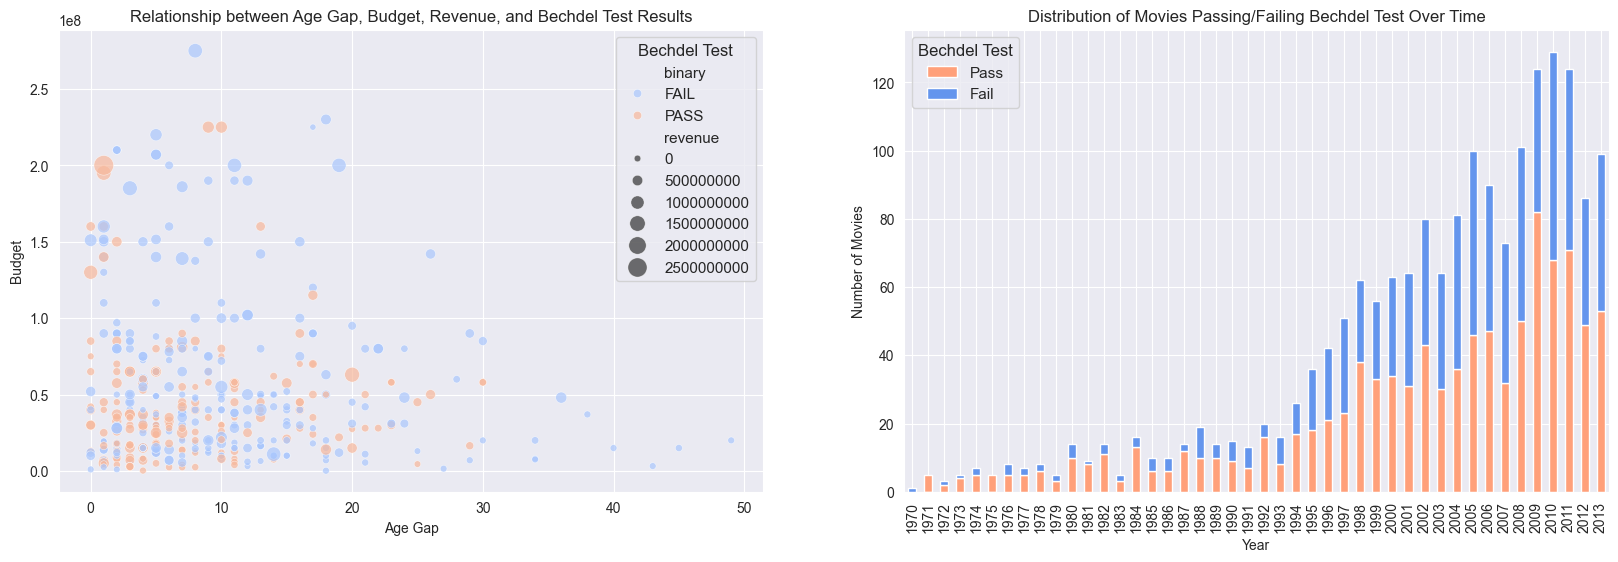

In [3]:
# create a figure with subplots as 1 row with 2 columns and adjust the size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# plot the first graph of scatter plot for view the relationship between age gap, budget, revenue, and bechdel test result
sns.set()
# start to plot the scatter plot with the x-axis as age_difference and y-axis as budget, the bubble size (scatter) would be based on the revenue to adjust the size. Then it would base on the bechdel test to differential into two categories then separate by different colors as coolwarm, and use the size to control the bubble size for the revenue attribute.
# alpha would be used to control the transparency for the bubble, and everything would be plotted within the subplot of (0,0) as setting in the parameter of ax
sns.scatterplot(data=merge_df, x='age_difference', y='budget', size='revenue', hue='binary',
                palette="coolwarm", sizes=(20, 200), alpha=0.7, ax=axes[0])
# set the xlabel, ylabel, title, and the legend 
axes[0].set_xlabel('Age Gap')
axes[0].set_ylabel('Budget')
axes[0].set_title('Relationship between Age Gap, Budget, Revenue, and Bechdel Test Results')
axes[0].legend(title='Bechdel Test', loc='upper right')

# group the data by both attributes as year and binary (as known as the bechdel test result either pass or fail) and count the number of movies in each category
grouped_data = movies_csv.groupby(["year", "binary"]).size().unstack().fillna(0)

# plot the second graph of stacking bar plot of the bechdel test result distribution over the year
# define the colors for pass and fail categories
colors = ['#FFA07A', '#6495ED']
# plot the bar plot and enable it to stack (else the bar plot will split the pass and fail into two difference bar to represent the same year data that would a bit confused and not good for visualizing)
grouped_data.plot(kind='bar', stacked=True, color=colors, ax=axes[1])
# setting up the xlabel, ylabel, and title for the second graph
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Movies')
axes[1].set_title('Distribution of Movies Passing/Failing Bechdel Test Over Time')
# setting up the legend
axes[1].legend(title='Bechdel Test', labels=['Pass', 'Fail'], loc='upper left')

# save the entire figure as a vector graphic
plt.savefig('combined_plots.svg', format='svg')
# show the subplot
plt.show()